# **Task 2: Predict Future Stock Prices**


In [29]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, HuberRegressor, RANSACRegressor, TheilSenRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split



 ## 1. **Load_Data**



In [30]:
stock_symbol = "AAPL"
data = yf.download(stock_symbol,start="2020-01-01",end="2024-12-25")

/tmp/ipython-input-439251941.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol,start="2020-01-01",end="2024-12-25")
[*********************100%***********************]  1 of 1 completed




 ## 2. **EDA**



In [31]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.468269,72.528589,71.223267,71.476607,135480400
2020-01-03,71.763687,72.523715,71.539299,71.696129,146322800
2020-01-06,72.335556,72.374162,70.634539,70.885472,118387200
2020-01-07,71.995377,72.600983,71.775811,72.345227,108872000
2020-01-08,73.153511,73.455110,71.698596,71.698596,132079200


In [32]:
data.isnull().sum()

,,0
Price,Ticker,
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1254 entries, 2020-01-02 to 2024-12-24
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1254 non-null   float64
 1   (High, AAPL)    1254 non-null   float64
 2   (Low, AAPL)     1254 non-null   float64
 3   (Open, AAPL)    1254 non-null   float64
 4   (Volume, AAPL)  1254 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.8 KB


In [34]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,1254.000000,1254.000000,1254.000000,1254.000000,1.254000e+03
mean,151.335255,152.858097,149.634814,151.177412,9.074460e+07
std,41.601527,41.739447,41.375049,41.536720,5.323936e+07
min,54.264332,55.263182,51.420154,55.161604,2.323470e+07
25%,126.462494,127.547060,124.276075,125.809742,5.549668e+07
50%,150.037766,151.868765,148.145764,149.912222,7.635050e+07
75%,175.979584,177.594960,174.583967,175.736153,1.080330e+08
max,257.037476,257.047410,254.140559,254.339671,4.265100e+08




 ## 3.**Spliting Data**


In [35]:
data.columns = ['_'.join(col).strip() for col in data.columns.values]
display(data.head())

,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL
Date,,,,,
2020-01-02,72.468269,72.528589,71.223267,71.476607,135480400
2020-01-03,71.763687,72.523715,71.539299,71.696129,146322800
2020-01-06,72.335556,72.374162,70.634539,70.885472,118387200
2020-01-07,71.995377,72.600983,71.775811,72.345227,108872000
2020-01-08,73.153511,73.455110,71.698596,71.698596,132079200


In [36]:
X = data[['Open_AAPL', 'High_AAPL', 'Low_AAPL', 'Volume_AAPL']]
y = data['Close_AAPL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1003, 4)
X_test shape: (251, 4)
y_train shape: (1003,)
y_test shape: (251,)


In [37]:
X = data[['Open_AAPL', 'High_AAPL', 'Low_AAPL', 'Volume_AAPL']]
y = data['Close_AAPL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1003, 4)
X_test shape: (251, 4)
y_train shape: (1003,)
y_test shape: (251,)




## 4.  **Write Utillity Functions**



In [47]:
def evalute_model(y_true, y_pred, model_name):
  mae = mean_absolute_error(y_true, y_pred)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")



## 5. **Finding Best Model**



In [40]:
models_to_tune = []

# Linear Regression
models_to_tune.append({
    'model': LinearRegression(),
    'params': {}
})

# Huber Regressor
models_to_tune.append({
    'model': HuberRegressor(),
    'params': {
        'epsilon': [1.0, 1.35, 1.5],
        'alpha': [0.0001, 0.001, 0.01]
    }
})

# RANSAC Regressor
models_to_tune.append({
    'model': RANSACRegressor(random_state=42),
    'params': {
        'min_samples': [0.5, 0.7],
        'max_trials': [100, 200]
    }
})

# TheilSen Regressor
models_to_tune.append({
    'model': TheilSenRegressor(random_state=42),
    'params': {}
})

# Decision Tree Regressor
models_to_tune.append({
    'model': DecisionTreeRegressor(random_state=42),
    'params': {
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5]
    }
})

# Random Forest Regressor
models_to_tune.append({
    'model': RandomForestRegressor(random_state=42),
    'params': {
        'n_estimators': [50, 100],
        'max_depth': [5, 10]
    }
})

# Gradient Boosting Regressor
models_to_tune.append({
    'model': GradientBoostingRegressor(random_state=42),
    'params': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
})

# AdaBoost Regressor
models_to_tune.append({
    'model': AdaBoostRegressor(random_state=42),
    'params': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1]
    }
})

# Support Vector Regressor (SVR)
models_to_tune.append({
    'model': SVR(),
    'params': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf'],
        'epsilon': [0.1, 0.2]
    }
})

# K-Neighbors Regressor
models_to_tune.append({
    'model': KNeighborsRegressor(),
    'params': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
})

# XGBoost Regressor
models_to_tune.append({
    'model': XGBRegressor(random_state=42, eval_metric='rmse'),
    'params': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
})

print(f"Defined {len(models_to_tune)} models for tuning.")

Defined 11 models for tuning.


In [48]:
from sklearn.model_selection import GridSearchCV

model_results = []

for model_dict in models_to_tune:
    model_name = type(model_dict['model']).__name__
    model = model_dict['model']
    params = model_dict['params']

    print(f"\n--- Tuning {model_name} ---")

    if not params:
        print("No parameters to tune. Fitting model directly.")
        model.fit(X_train, y_train)
        best_estimator = model
        best_params = {}
        best_score = None
    else:
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=params,
            cv=3,
            scoring='neg_mean_absolute_error',
            verbose=0,
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)
        best_estimator = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_score = -grid_search.best_score_
        print(f"Best parameters for {model_name}: {best_params}")
        print(f"Best CV MAE score for {model_name}: {best_score:.2f}")

    y_pred = best_estimator.predict(X_test)
    evalute_model(y_test, y_pred, model_name)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    model_results.append({
        'model_name': model_name,
        'best_params': best_params,
        'best_cv_score': best_score,
        'test_mae': mae,
        'test_mse': mse
    })

print("\n--- Summary of Model Results ---")
for result in model_results:
    print(f"Model: {result['model_name']}")
    print(f"  Best Parameters: {result['best_params']}")
    print(f"  Test MAE: {result['test_mae']:.2f}")
    print(f"  Test MSE: {result['test_mse']:.2f}")


--- Tuning LinearRegression ---
No parameters to tune. Fitting model directly.
LinearRegression - MAE: 0.76, RMSE: 1.05

--- Tuning HuberRegressor ---
Best parameters for HuberRegressor: {'alpha': 0.01, 'epsilon': 1.0}
Best CV MAE score for HuberRegressor: 29.53
HuberRegressor - MAE: 87.17, RMSE: 115.45

--- Tuning RANSACRegressor ---
Best parameters for RANSACRegressor: {'max_trials': 100, 'min_samples': 0.5}
Best CV MAE score for RANSACRegressor: 0.73
RANSACRegressor - MAE: 0.76, RMSE: 1.05

--- Tuning TheilSenRegressor ---
No parameters to tune. Fitting model directly.
TheilSenRegressor - MAE: 0.78, RMSE: 1.05

--- Tuning DecisionTreeRegressor ---
Best parameters for DecisionTreeRegressor: {'max_depth': None, 'min_samples_split': 2}
Best CV MAE score for DecisionTreeRegressor: 1.32
DecisionTreeRegressor - MAE: 1.30, RMSE: 1.80

--- Tuning RandomForestRegressor ---
Best parameters for RandomForestRegressor: {'max_depth': 10, 'n_estimators': 100}
Best CV MAE score for RandomForestReg

## 6. **Visualize Model Performance**


/tmp/ipython-input-4112614978.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model_name', y='test_mae', data=results_df_sorted_mae, palette='viridis')


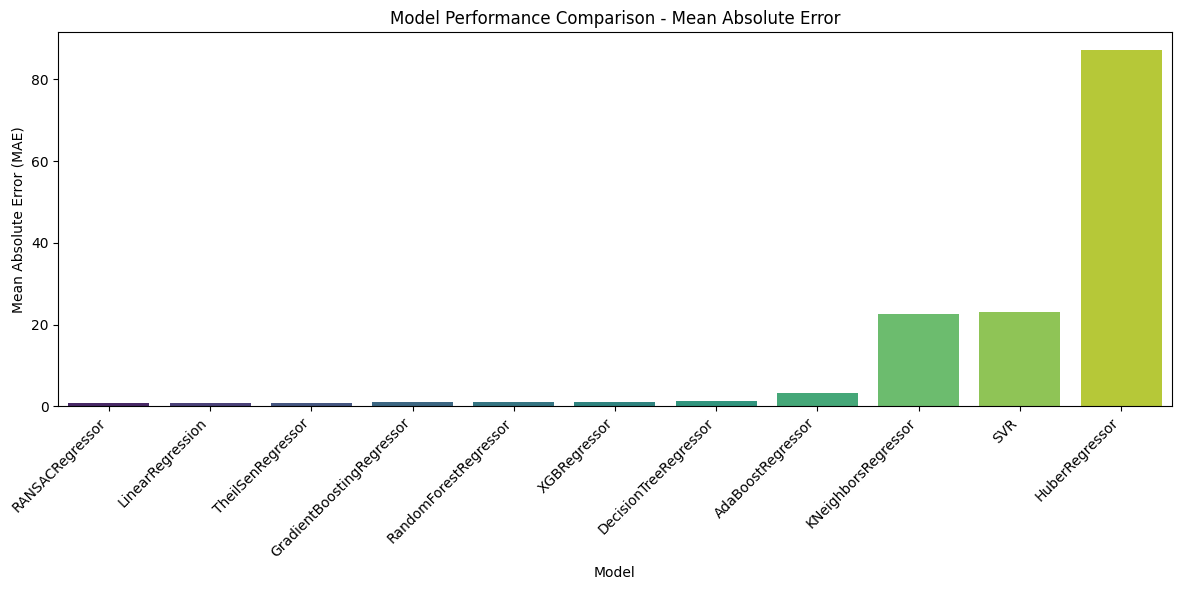

/tmp/ipython-input-4112614978.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model_name', y='test_mse', data=results_df_sorted_mse, palette='magma')


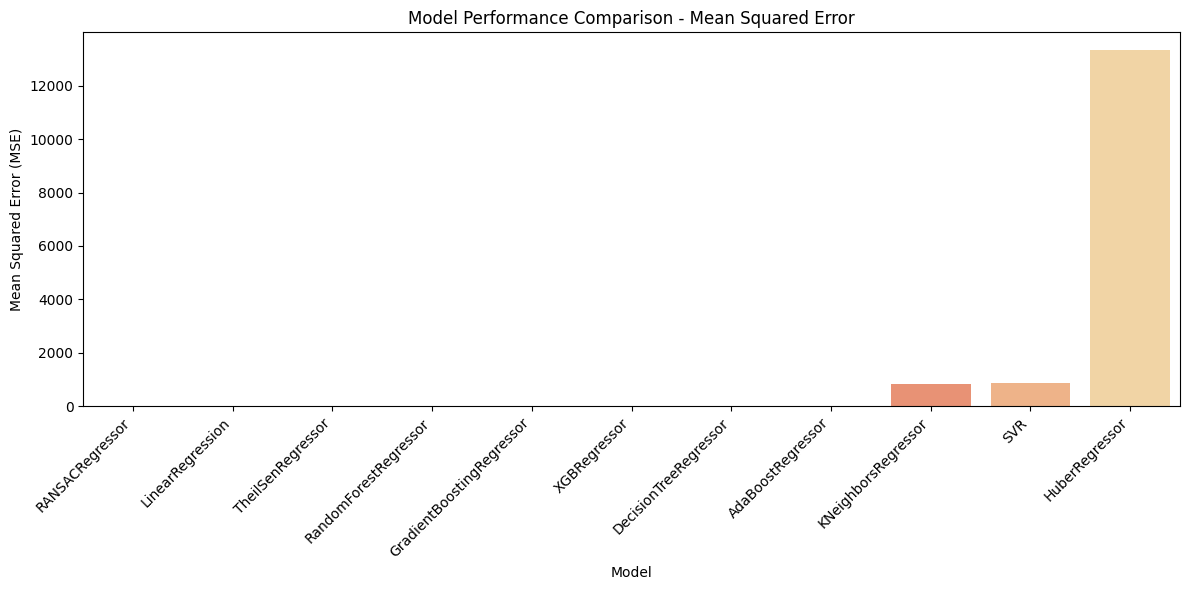

Model performance visualization complete.


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

results_df = pd.DataFrame(model_results)

results_df_sorted_mae = results_df.sort_values(by='test_mae', ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='model_name', y='test_mae', data=results_df_sorted_mae, palette='viridis')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Model Performance Comparison - Mean Absolute Error')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

results_df_sorted_mse = results_df.sort_values(by='test_mse', ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='model_name', y='test_mse', data=results_df_sorted_mse, palette='magma')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Performance Comparison - Mean Squared Error')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Model performance visualization complete.")

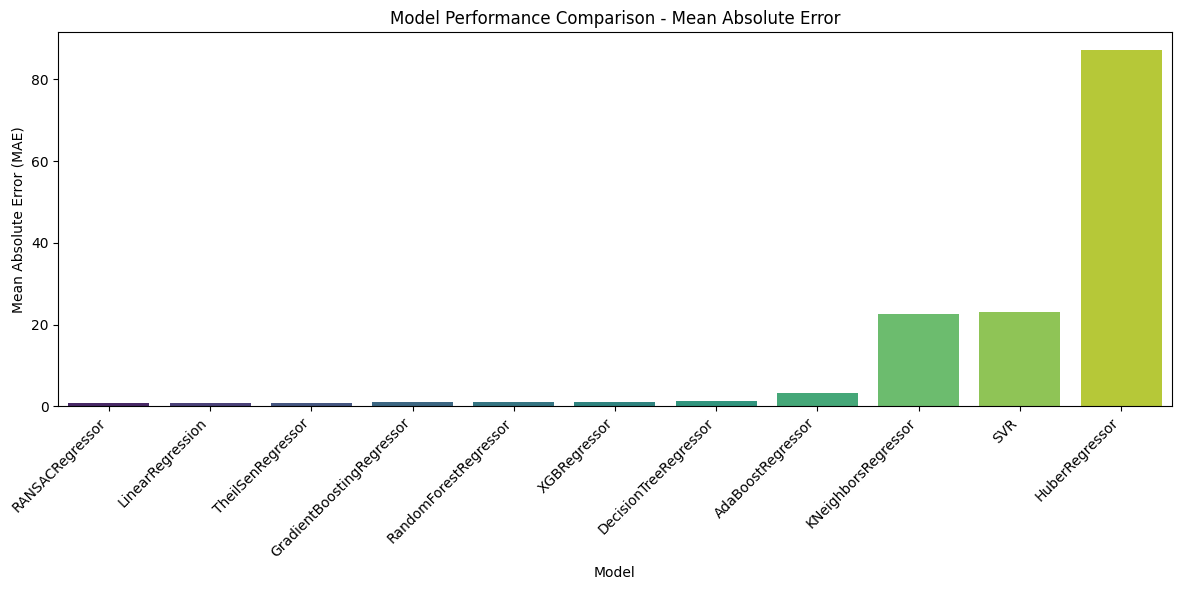

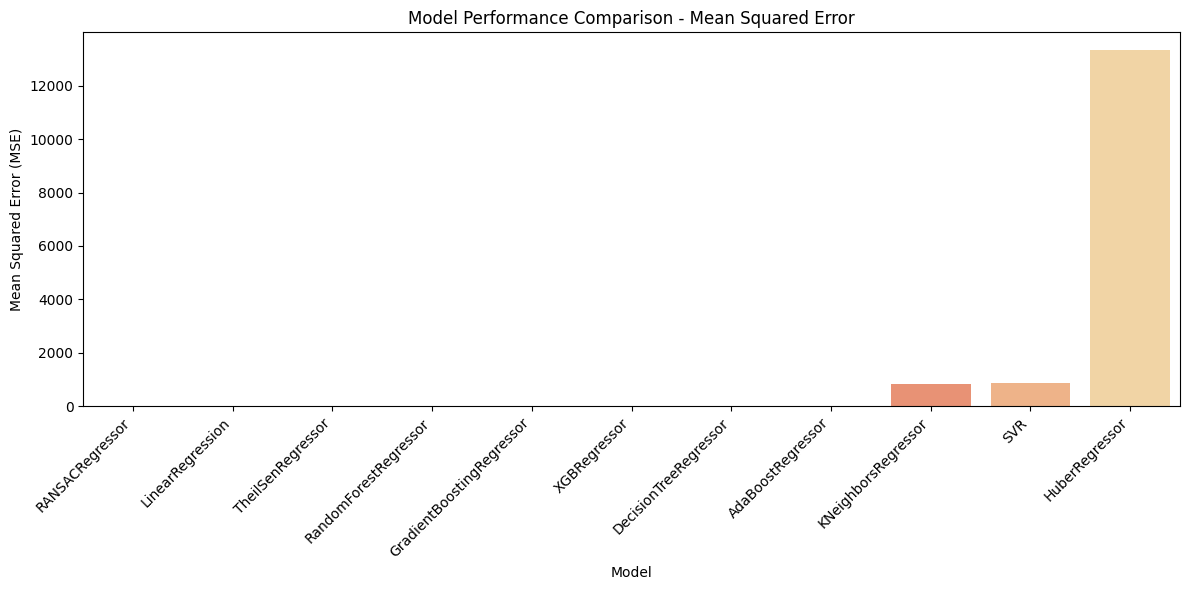

Model performance visualization complete.


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

results_df = pd.DataFrame(model_results)

results_df_sorted_mae = results_df.sort_values(by='test_mae', ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='model_name', y='test_mae', hue='model_name', data=results_df_sorted_mae, palette='viridis', legend=False)
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Model Performance Comparison - Mean Absolute Error')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

results_df_sorted_mse = results_df.sort_values(by='test_mse', ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='model_name', y='test_mse', hue='model_name', data=results_df_sorted_mse, palette='magma', legend=False)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Performance Comparison - Mean Squared Error')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Model performance visualization complete.")

In [44]:
best_model_mae = results_df_sorted_mae.iloc[0]
best_model_mse = results_df_sorted_mse.iloc[0]

print("\n--- Best Model based on MAE ---")
print(f"Model Name: {best_model_mae['model_name']}")
print(f"Best Parameters: {best_model_mae['best_params']}")
print(f"Test MAE: {best_model_mae['test_mae']:.2f}")
print(f"Test MSE: {best_model_mae['test_mse']:.2f}")

print("\n--- Best Model based on MSE ---")
print(f"Model Name: {best_model_mse['model_name']}")
print(f"Best Parameters: {best_model_mse['best_params']}")
print(f"Test MAE: {best_model_mse['test_mae']:.2f}")
print(f"Test MSE: {best_model_mse['test_mse']:.2f}")


--- Best Model based on MAE ---
Model Name: RANSACRegressor
Best Parameters: {'max_trials': 100, 'min_samples': 0.5}
Test MAE: 0.76
Test MSE: 1.09

--- Best Model based on MSE ---
Model Name: RANSACRegressor
Best Parameters: {'max_trials': 100, 'min_samples': 0.5}
Test MAE: 0.76
Test MSE: 1.09



## 7. **Final Model**



In [49]:
final_model = RANSACRegressor(max_trials=100,min_samples=0.5)

In [50]:
final_model.fit(X_train,y_train)

RANSACRegressor(min_samples=0.5)

In [51]:
y_pred = final_model.predict(X_test)

In [53]:
evalute_model(y_test,y_pred,"RANSACRegressor")

RANSACRegressor - MAE: 0.76, RMSE: 1.05


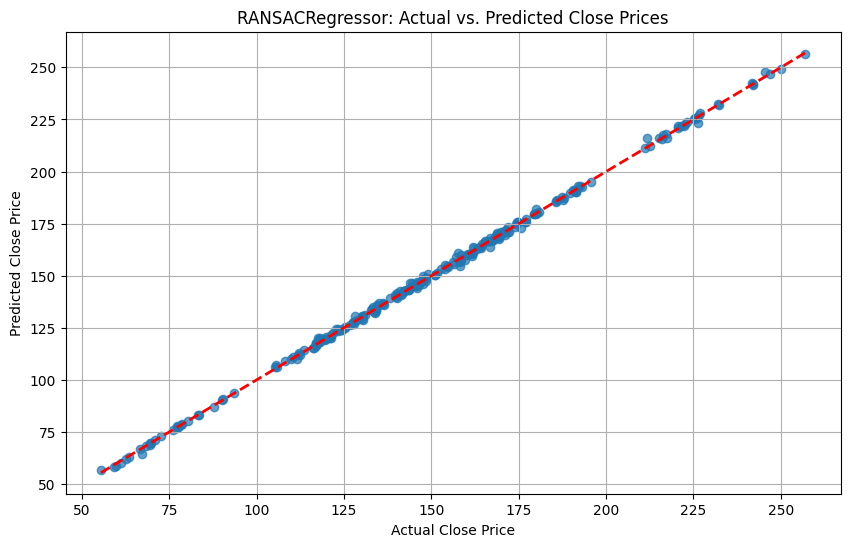

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('RANSACRegressor: Actual vs. Predicted Close Prices')
plt.grid(True)
plt.show()